In [5]:
import pandas as pd

In [6]:
import os

os.getcwd()

'/content'

In [8]:
df = pd.read_csv("/BA_reviews.csv")

## Data cleaning

In [9]:
df

,Unnamed: 0,reviews
0,0,✅ Trip Verified | BA 242 on the 6/2/23. Boardi...
1,1,✅ Trip Verified | Not only my first flight in...
2,2,✅ Trip Verified | My husband and myself were ...
3,3,✅ Trip Verified | Organised boarding process. ...
4,4,✅ Trip Verified | Outward journey BA245 Londo...
...,...,...
995,995,✅ Trip Verified | Madrid to London. Credit whe...
996,996,✅ Trip Verified | Venice to Gatwick. I use Sno...
997,997,✅ Trip Verified | First 3 legs were trouble fr...
998,998,✅ Trip Verified | Flew London to Budapest with...


In [10]:
df.drop("Unnamed: 0", axis = 1, inplace= True)

In [11]:
df

,reviews
0,✅ Trip Verified | BA 242 on the 6/2/23. Boardi...
1,✅ Trip Verified | Not only my first flight in...
2,✅ Trip Verified | My husband and myself were ...
3,✅ Trip Verified | Organised boarding process. ...
4,✅ Trip Verified | Outward journey BA245 Londo...
...,...
995,✅ Trip Verified | Madrid to London. Credit whe...
996,✅ Trip Verified | Venice to Gatwick. I use Sno...
997,✅ Trip Verified | First 3 legs were trouble fr...
998,✅ Trip Verified | Flew London to Budapest with...


In [12]:
df = df["reviews"].str.split("|", expand=True)

In [13]:
df = df.rename(columns={0:"Verification", 1: "Comment"})

In [14]:
df

,Verification,Comment
0,✅ Trip Verified,BA 242 on the 6/2/23. Boarding was delayed du...
1,✅ Trip Verified,"Not only my first flight in 17 years, but al..."
2,✅ Trip Verified,My husband and myself were flying to Madrid ...
3,✅ Trip Verified,Organised boarding process. Really friendly c...
4,✅ Trip Verified,Outward journey BA245 London to Buenos Aires...
...,...,...
995,✅ Trip Verified,Madrid to London. Credit where it's due. Flew...
996,✅ Trip Verified,Venice to Gatwick. I use Snokart luggage whic...
997,✅ Trip Verified,First 3 legs were trouble free. Lounges were ...
998,✅ Trip Verified,Flew London to Budapest with British Airways....


In [15]:
df = df.reset_index().rename(columns = {"index":"Id"})
df.head()

,Id,Verification,Comment
0,0,✅ Trip Verified,BA 242 on the 6/2/23. Boarding was delayed du...
1,1,✅ Trip Verified,"Not only my first flight in 17 years, but al..."
2,2,✅ Trip Verified,My husband and myself were flying to Madrid ...
3,3,✅ Trip Verified,Organised boarding process. Really friendly c...
4,4,✅ Trip Verified,Outward journey BA245 London to Buenos Aires...


## Trips that are not verified

In [16]:
df[df['Verification'].str.contains("Not")]

,Id,Verification,Comment
11,11,Not Verified,It seems that there is a race to the bottom a...
12,12,Not Verified,As a Spanish born individual living in Engla...
16,16,Not Verified,I find BA incredibly tacky and constantly lo...
18,18,Not Verified,Great thing about British Airways A380 is th...
19,19,Not Verified,"The staff are friendly. The plane was cold, w..."
...,...,...,...
868,868,Not Verified,Glasgow to Miami via London. Glasgow to Heat...
877,877,Not Verified,London Heathrow to Düsseldorf. Really good c...
945,945,Not Verified,"Los Angeles to London. I booked with AA, LAX..."
946,946,Not Verified,The overall flight wasn't too bad. Seats and...


In [17]:
df["Comment"][11]

' It seems that there is a race to the bottom amongst airlines. I cannot even check in because BA requires the submission of documents for Covid restrictions. However the form to start the submission process is hopelessly broken. After clicking "submit" the form just hangs forever. No error message is given. I tried three different browsers on three different devices. All have the same hang. Which means you cannot check in online nor can you select a seat. I tried using the chat bot, but after 30 minutes of clicking "try again" I thought I had donated enough time to BA. '

## VADER Seniment Scoring

In [18]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm #Progress bar 

In [22]:
 import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [23]:
sia = SentimentIntensityAnalyzer()

In [24]:
sia.polarity_scores(df["Comment"][11])

{'neg': 0.078, 'neu': 0.922, 'pos': 0.0, 'compound': -0.6808}

## Roberta model

In [26]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 73.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 106.0 MB/s eta 0:00:00


In [27]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

# Do not run this code, it requires GPU and that is not available on this local machine

In [28]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [29]:
# Run for Roberta Model
encoded_text = tokenizer(df["Comment"][11], return_tensors='pt') # Encoded text
output = model(**encoded_text) # Running model on encoded text
scores = output[0][0].detach().numpy() # Converting tensor output to numpy
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.9187368, 'roberta_neu': 0.07319002, 'roberta_pos': 0.008073245}


In [30]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

# Only run this code when using Google colab GPU

In [31]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Comment']
        myid = row['Id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value # Rename keys to vader_neg, vader_pos, vader_neu
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result} # combining two dictionaries
        res[myid] = both #???
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/1000 [00:00<?, ?it/s]

Broke for id 20
Broke for id 28
Broke for id 106
Broke for id 126
Broke for id 191
Broke for id 250
Broke for id 272
Broke for id 327
Broke for id 396
Broke for id 397
Broke for id 534
Broke for id 558
Broke for id 591
Broke for id 691
Broke for id 715
Broke for id 779
Broke for id 791
Broke for id 847
Broke for id 862
Broke for id 879
Broke for id 884
Broke for id 889
Broke for id 900
Broke for id 964
Broke for id 970
Broke for id 971


In [32]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df, how='left')

In [33]:
results_df.head()

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,Verification,Comment
0,0,0.032,0.650,0.318,0.9564,0.005097,0.038937,0.955966,✅ Trip Verified,BA 242 on the 6/2/23. Boarding was delayed du...
1,1,0.023,0.788,0.189,0.9930,0.007140,0.053335,0.939525,✅ Trip Verified,"Not only my first flight in 17 years, but al..."
2,2,0.023,0.809,0.168,0.9933,0.171544,0.458566,0.369891,✅ Trip Verified,My husband and myself were flying to Madrid ...
3,3,0.000,0.605,0.395,0.9371,0.001525,0.011498,0.986977,✅ Trip Verified,Organised boarding process. Really friendly c...
4,4,0.095,0.817,0.088,-0.0980,0.701900,0.257831,0.040269,✅ Trip Verified,Outward journey BA245 London to Buenos Aires...


In [34]:
results_df["Comment"][16]

'  I find BA incredibly tacky and constantly looking for ways to get money out of customers. I have travelled using major airlines my whole life and although I know it sounds silly - when on a 4 hour flight on a major airline you do expect some form of beverage or snack as a curtesy and a port to charge your phone and not have to pay insane prices for luggage. There was no inflight entertainment and the aircraft was very snug, when I challenged why I had to pay for my own drink and why no inflight entertainment - I was told it was a short haul fight. My sisters met me from Cairo (which is an hour and half flight) and flew Egyptair and somehow received luggage allowance, drinks, food and inflight entertainment as well as a USB port to charge their phones. BA I now realise stands for Budget Airline. Staff were great - what you got for your money not so much.'

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been as

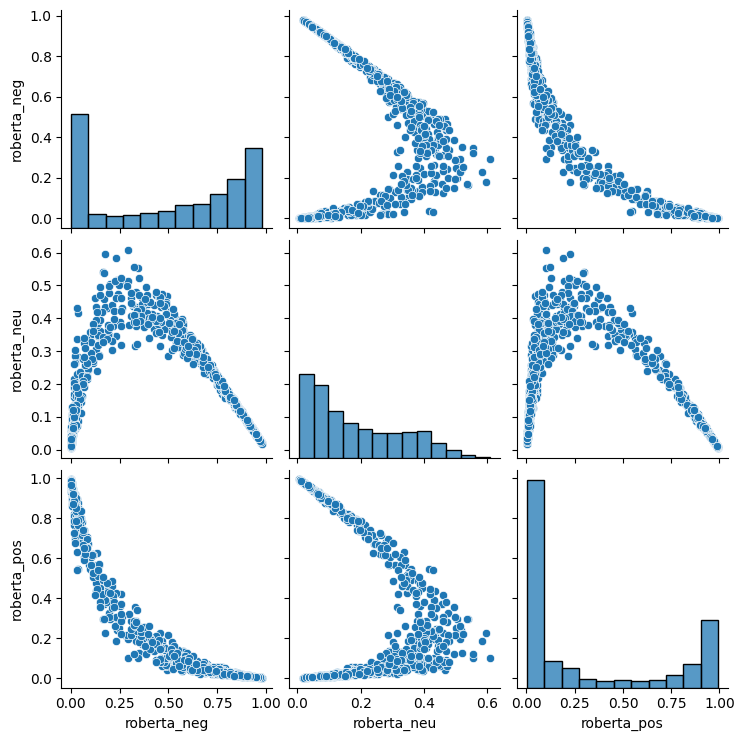

In [36]:
sns.pairplot(data=results_df,
             vars=['roberta_neg', 'roberta_neu', 'roberta_pos'],
            palette='tab10');
plt.show();

In [37]:
results_df['Max'] = results_df[['roberta_neg', 'roberta_neu', 'roberta_pos']].idxmax(axis=1)

In [38]:
results_df.head(2)

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,Verification,Comment,Max
0,0,0.032,0.650,0.318,0.9564,0.005097,0.038937,0.955966,✅ Trip Verified,BA 242 on the 6/2/23. Boarding was delayed du...,roberta_pos
1,1,0.023,0.788,0.189,0.9930,0.007140,0.053335,0.939525,✅ Trip Verified,"Not only my first flight in 17 years, but al...",roberta_pos


In [39]:
results_df['Max'].replace({'roberta_neg': 'Negative', 'roberta_pos': 'Positive', 'roberta_neu': 'Neutral'}, inplace = True)

<Axes: title={'center': 'Histogram Of Sentiment Frequency'}, xlabel='Sentiments'>

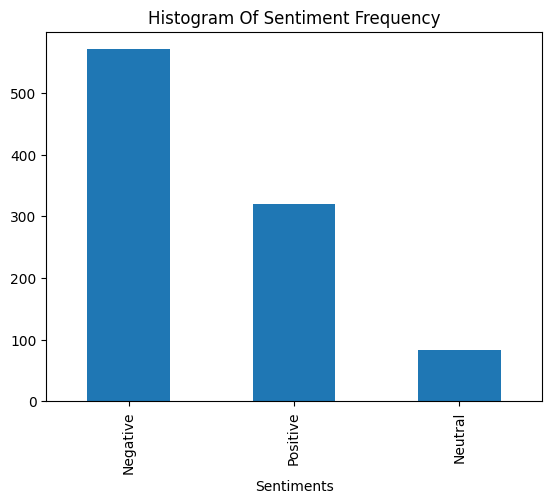

In [40]:
results_df["Max"].value_counts().plot(kind = "bar", title = "Histogram Of Sentiment Frequency", xlabel = "Sentiments")

In [41]:
results_df["Max"].value_counts(normalize = True)

Negative    0.586242
Positive    0.328542
Neutral     0.085216
Name: Max, dtype: float64

In [42]:
tokens = ' '.join(results_df["Comment"]).split(' ')

In [43]:
len(tokens)

135543

In [44]:
tokens[:10]

['', 'BA', '242', 'on', 'the', '6/2/23.', 'Boarding', 'was', 'delayed', 'due']

In [46]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [47]:
from nltk.corpus import stopwords
stop_words = stopwords.words("english")

In [48]:
tokens_no_sw = [item for item in tokens if item not in stop_words] # Remove stop words from token
len(tokens_no_sw)

80967

In [49]:
tokens_no_sw.count("help")

69

In [50]:
tokens_dict = {}
for w in tqdm(tokens_no_sw):
  tokens_dict[w] = tokens_no_sw.count(w)/len(tokens_no_sw)

  0%|          | 0/80967 [00:00<?, ?it/s]

In [52]:
tokens_dict

{'': 0.025924141934368324,
 'BA': 0.010992132597230971,
 '242': 1.2350710783405585e-05,
 '6/2/23.': 1.2350710783405585e-05,
 'Boarding': 0.0007780947793545518,
 'delayed': 0.001605592401842726,
 'due': 0.0017167487988933763,
 'late': 0.0010621611273728803,
 'arrival': 0.000802796200921363,
 'incoming': 3.7052132350216754e-05,
 'flight.': 0.003248236936035669,
 'Communication': 1.2350710783405585e-05,
 'ground': 0.0007286919362209295,
 'staff': 0.0037299146565884867,
 'excellent': 0.0007163412254375239,
 'keep': 0.0003952227450689787,
 'us': 0.00274185779391604,
 'informed.': 4.940284313362234e-05,
 'In': 0.0008151469117047686,
 'flight': 0.014586189435201995,
 'services': 0.0002717156372349229,
 'excellent,': 0.00012350710783405586,
 'crews': 0.00018526066175108378,
 'friendly': 0.0011733175244235305,
 'service!': 3.7052132350216754e-05,
 'Overall,': 0.00041992416663578987,
 'happy': 0.00041992416663578987,
 'BA.': 0.0009139525979720133,
 'Not': 0.0005928341176034681,
 'first': 0.00196

In [53]:
from collections import OrderedDict
import numpy as np

keys = list(tokens_dict.keys())
values = list(tokens_dict.values())
sorted_value_index = np.argsort(values)
sorted_dict = {keys[i]: values[i] for i in sorted_value_index}
 
print(sorted_dict)

{'BA2058.': 1.2350710783405585e-05, '“thanks': 1.2350710783405585e-05, 'raising': 1.2350710783405585e-05, 'issue;': 1.2350710783405585e-05, 'Anyways': 1.2350710783405585e-05, 'name”.': 1.2350710783405585e-05, '“Change': 1.2350710783405585e-05, 'century.': 1.2350710783405585e-05, 'mistakes.': 1.2350710783405585e-05, 'carefully.': 1.2350710783405585e-05, 'unusable.': 1.2350710783405585e-05, 'impossible.': 1.2350710783405585e-05, 'dad': 1.2350710783405585e-05, 'mums': 1.2350710783405585e-05, 'la-“': 1.2350710783405585e-05, 'Chat”.': 1.2350710783405585e-05, 'mum': 1.2350710783405585e-05, 'hectic': 1.2350710783405585e-05, '1.40': 1.2350710783405585e-05, '7.45': 1.2350710783405585e-05, '15-20': 1.2350710783405585e-05, 'scanned.': 1.2350710783405585e-05, '15-30': 1.2350710783405585e-05, 'counters,': 1.2350710783405585e-05, 'unavailability': 1.2350710783405585e-05, 'mismanaged': 1.2350710783405585e-05, 'Poorly': 1.2350710783405585e-05, 'Aberdeen.': 1.2350710783405585e-05, 'tunnel': 1.235071078

In [56]:
words = list(sorted_dict.keys())
freq = list(sorted_dict.values())
zip(words, freq)

In [67]:
words = words[-30:] # Most frequent 30 words
freq = freq[-30:]
words

['back',
 'could',
 'hours',
 'Heathrow',
 'us',
 'Airways',
 'We',
 'class',
 'flight.',
 'business',
 'get',
 'seats',
 'good',
 'staff',
 'time',
 'cabin',
 'one',
 'would',
 '-',
 'British',
 'food',
 'crew',
 'seat',
 'London',
 'service',
 'BA',
 'The',
 'flight',
 '',
 'I']

In [68]:
len(words)

30

In [81]:
for i,j in zip(words, freq):
  if len(i)<4:
    print(i)
    words.remove(i)
    freq.remove(j)
print(f"Length of words list is {len(words)}, Length of frequency list is {len(freq)}")

The
I
Length of words list is 21, Length of frequency list is 21


In [80]:
len(words[-1])

1

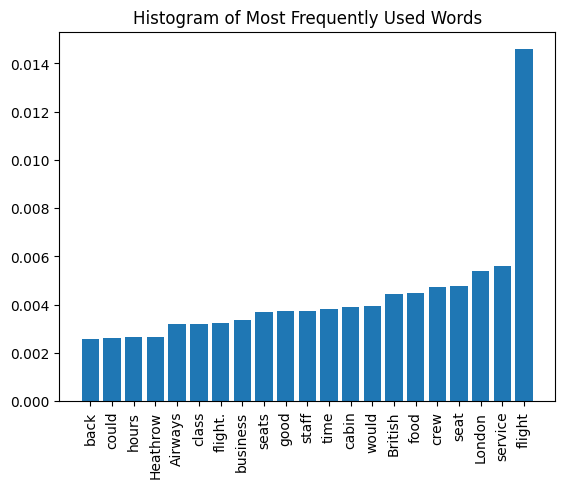

In [85]:
plt.bar(range(len(words)), freq, tick_label = words)
plt.title("Histogram of Most Frequently Used Words")
plt.xticks(rotation=90);

In [66]:
test = [1,2,3,4,5,6,7,8,9,0]
test[-5:]

[6, 7, 8, 9, 0]